In [2]:
import numpy as np

# 출력층 설계하기
- 신경망은 분류와 회귀 모두에 이용 가능
- 어떤 문제냐에 따라 사용하는 `활성화 함수`가 달라짐
    - 일반적으로
    - 회귀 : 항등함수
    - 분류 : 소프트맥스

### 항등 함수와 소프트맥스 함수 구현하기

### 소프트맥스(softmax 함수)

$$
\begin{align}
\text{y}_k
=
\frac{exp(a_k)}{\sum\limits^{^n}_{i=1} exp(a_i)}
\tag{n: 출력층의 뉴런 수, y_k는 그중 k번째 출력}
\end{align}
$$

In [3]:
# 소프트맥스 함수 구현 (인터프리터 사용)
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [4]:
# 소프트맥스 함수 구현 (def)
def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수 구현 시 주의점

- 컴퓨터로 계산 할 때 결함이 있을 수 있다 -> 오버플로 문제
- 지수함수(exponetial) 사용하기에 값이 엄청 크게 튈 수 있다.
- 예를 들어 $ e^{1000} $ 은 inf를 반환함 -> 이런 큰 값끼리 나누기 하면 결과 수치가 `불안정`해진다

- `오버플로` : 컴퓨터는 4byte, 8byte와 같은 크기가 유한한 데이터를 다룸, 즉, 표현 가능한 수 범위가 한정되어 너무 큰 값은 표현이 불가능 해 문제가 발생하는데 이런 문제를 오버플로라 함. (컴퓨터로 수치계산시 주의해야함)

- 소프트 맥스 함수식 개선 작업
$$
\begin{align}
\text{y}_k
=
\frac{exp(a_k)}{\sum\limits^{^n}_{i=1} exp(a_i)}
=
\frac{Cexp(a_k)}{C\sum\limits^{^n}_{i=1} exp(a_i)}
=
\frac{exp(a_k+logC)}{\sum\limits^{^n}_{i=1} exp(a_i+logC)}
=
\frac{exp(a_k+C')}{\sum\limits^{^n}_{i=1} exp(a_i+C')}
\end{align}
$$

- C는 임의의 정수, 지수법칙을 이용해 exp안으로 밀어 넣음, logC는 어차피 상수니까 그냥 C'으로 바꿔씀
- 소프트 맥스 지수 함수를 계산할 때 어떤 정수를 더해도 (혹은 빼도) 결과는 바뀌지 않는다는 것
- C'은 아무 값이나 넣어도 됨, 단, 오버플로를 막을 목적으로는 `입력 신호 중 최댓값`을 이용하는게 일반적

In [5]:
# 예 (오버플로 문제 터짐 = overflow encounterd in exp)
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-5-1d14fb628140>:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-5-1d14fb628140>:3: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [6]:
c = np.max(a) # array에서 최대값 검출
a - c

array([  0, -10, -20])

In [7]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 개선된 소프트맥스 구현

In [8]:
# 개선된 소프트맥스 함수 구현 (def)
def softmax(a) :
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책으로 
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수의 특징

In [9]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [10]:
np.sum(y)

1.0

- 소프트맥스 함수의 출력은 0 에서 1.0 사이 실수
- 출력의 총합은 1이다. ( -> 확률처럼 해석할 수 있게 해준다)
    - 즉, 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것
- 주의 : 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.
    - why? exp(x) 는 단조 증가 함수

기계학습의 문제 풀이 : `학습` & `추론` \
학습 : 모델을 학습 \
추론 : 앞서 학습한 모델로 미지의 데이터에 대해서 추론(분류) 작업 수행 \
추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적, 학습시킬때는 출력층에서 소프트맥스 함수를 사용함


신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식함 \
그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다 \
결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다. \
현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다

### 출력층의 뉴런 수 정하기

- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절하게 설정해야함.
- 분류 : 분류하고 싶은 클래스 수로 설정하는게 일반적

#### MNIST이용해서 예제 풀어보기
- 순전파(forward propagation)
- training : 가중치 매개변수 학습 -> test 분류

In [11]:
# 케라스에서 불러오기
from keras.datasets import mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
from PIL import Image

def img_show(img) :
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(28, 28)
(28, 28)


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

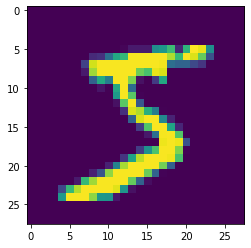

In [15]:
plt.imshow(img)

In [19]:
# mnist.py에서 불러오기
import sys, os
sys.path.append(os.pardir)
from datasets.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

ModuleNotFoundError: No module named 'datasets'